# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
monthly_income = 12000

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"] * my_btc
my_eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33189.60
The current value of your 5.3 ETH is $9944.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2023-04-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=="AGG"].drop(['symbol', 'trade_count', 'vwap'], axis=1)
SPY = df_ticker[df_ticker['symbol']=="SPY"].drop(['symbol', 'trade_count', 'vwap'], axis=1)
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis = 1, keys=['AGG', 'SPY'])
df_ticker.head(10)

AGG                                   SPY  \
                            open   high    low  close   volume    open   
timestamp                                                                
2023-04-21 04:00:00+00:00  99.51  99.56  99.11  99.17  5294282  412.19   

                                                            
                             high     low  close    volume  
timestamp                                                   
2023-04-21 04:00:00+00:00  412.68  410.17  412.2  72023892

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.17
Current SPY closing price: $412.2


In [10]:
# Compute the current value of shares
my_spy = 50
my_agg = 200

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20610.00
The current value of your 200 AGG shares is $19834.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 15000
# Consolidate financial assets data
crypto = 106407.569394
shares = 37516.500000

# Create savings DataFrame
# YOUR CODE HERE!
savings_data  = {
    "crypto": [crypto],
    "shares": [shares]
}

df_savings = pd.DataFrame(savings_data, columns=['crypto', 'shares'], index=["amount"])
# Display savings DataFrame
df_savings = df_savings.transpose()
display(df_savings)

,amount
crypto,106407.569394
shares,37516.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

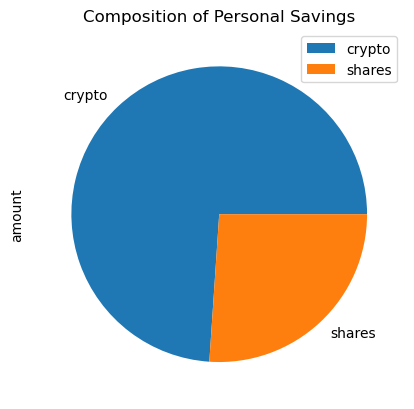

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings', ylabel='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_savings = float(df_savings.sum())
# Validate saving health
if total_amount_of_savings > emergency_fund * 3 :
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("OPPS you need to do something to save your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
weights = [0.6, 0.4]
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
HIST_AGG = df_stock_data[df_stock_data['symbol']=="AGG"].drop(['symbol', 'trade_count', 'vwap'], axis=1)
HIST_SPY = df_stock_data[df_stock_data['symbol']=="SPY"].drop(['symbol', 'trade_count', 'vwap'], axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([HIST_AGG, HIST_SPY], axis = 1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                              SPY                                       
                             open    high     low     close     volume  
timestamp                                                               
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515  
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142  
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810  
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222  
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
def monte_carlo_simulation(no_of_years):
    return MCSimulation(
        portfolio_data = df_stock_data,
        num_simulation = num_sims,
        num_trading_days = 252 * no_of_years
    )
# Configure a Monte Carlo simulation to forecast one year daily returns
MC_df_stock_data = monte_carlo_simulation(1)


In [17]:
# Printing the simulation input data
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


C:\Users\rosha\Desktop\unit5_financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000053,0.996861,0.989153,1.000055,0.996955,1.003464,0.995929,1.003208,1.004517,0.995454,...,0.995727,0.996961,1.002120,0.999462,1.004649,1.004410,0.999079,0.992620,1.009286,0.996749
2,0.991674,0.995190,0.982953,0.999526,0.995850,1.001965,1.008843,1.008366,0.996041,1.001173,...,0.998796,0.998560,1.004837,1.000610,1.001422,0.999904,0.997974,0.998742,1.018657,0.998446
3,0.997755,1.001004,0.990777,0.997522,1.004435,1.003169,1.014789,1.005966,1.004972,1.007046,...,0.994948,1.003391,0.997143,0.999895,0.998628,1.007481,0.989065,1.001682,1.020387,0.992909
4,1.001505,0.991618,0.995290,1.001792,1.003041,1.006722,1.010773,1.015490,0.998751,1.013066,...,0.993187,1.006076,0.999023,1.004579,0.999049,1.018217,0.984207,1.015865,1.021584,0.988050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.069700,0.973186,1.138146,1.099445,1.066152,1.033109,1.139647,1.227148,0.992279,1.225967,...,0.957049,1.065252,1.021833,1.127803,1.099617,0.949296,1.052583,0.966254,0.990287,1.143452
249,1.067368,0.973653,1.147088,1.103551,1.058316,1.027981,1.133165,1.225111,0.996573,1.232753,...,0.959356,1.060613,1.023455,1.138923,1.101436,0.953757,1.055893,0.968223,0.988529,1.155174
250,1.070823,0.973450,1.147082,1.117150,1.053207,1.036745,1.142383,1.234478,0.999242,1.224976,...,0.959637,1.058680,1.011440,1.129060,1.107042,0.965118,1.049758,0.960543,0.996699,1.154304
251,1.068740,0.974931,1.155592,1.118835,1.056069,1.042152,1.149051,1.237931,0.994870,1.215451,...,0.958247,1.055080,1.021046,1.124377,1.103211,0.957649,1.055070,0.962330,0.988909,1.141454


In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df_stock_data = monte_carlo_simulation(30)
MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rosha\Desktop\unit5_financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

In [ ]:
# Plot simulation outcomes
line_plot = MC_df_stock_data.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_stock_data[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
display(df_closing_prices.head())
df_stock_data_daily_returns = df_closing_prices.pct_change().dropna().dot(weights)
df_stock_data_daily_returns.plot.hist(alpha=0.5)
df_stock_data_daily_returns.plot.density()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_statistics = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(simulated_returns_statistics)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulated_returns_statistics[8]*initial_investment,2)
ci_upper = round(simulated_returns_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(simulated_returns_statistics[8]*initial_investment,2)
ci_upper = round(simulated_returns_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data = monte_carlo_simulation(5)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
MC_df_stock_data.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC_df_stock_data.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_statistics = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(simulated_returns_statistics)

In [ ]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(simulated_returns_statistics[8]*initial_investment,2)
ci_upper_five = round(simulated_returns_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data = monte_carlo_simulation(10)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_stock_data.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
MC_df_stock_data.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC_df_stock_data.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_statistics = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
print(simulated_returns_statistics)

In [ ]:
# Set initial investment
initial_investment = 45000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(simulated_returns_statistics[8]*initial_investment,2)
ci_upper_ten = round(simulated_returns_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")